In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman' 

In [2]:
dir_ls1 = [
    "/data4/nakao/AdaptiveFEM/work/work_5000_1/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_2/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_3/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_4/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_5/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_6/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_7/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_8/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_9/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_10/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_11/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_12/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_13/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_14/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_15/",
]
dir_ls2 = [
    "/data4/nakao/AdaptiveFEM/work/work_2500_1/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_2/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_3/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_4/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_5/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_6/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_7/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_8/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_9/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_10/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_11/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_12/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_13/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_14/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_15/",
]
dir_ls3 = [
    "/data4/nakao/AdaptiveFEM/work/work_1250_1/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_2/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_3/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_4/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_5/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_6/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_7/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_8/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_9/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_10/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_11/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_12/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_13/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_14/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_15/",
]
dir_ls4 = [
    "/data4/nakao/AdaptiveFEM/work/work_625_1/",
    "/data4/nakao/AdaptiveFEM/work/work_625_2/",
    "/data4/nakao/AdaptiveFEM/work/work_625_3/",
    "/data4/nakao/AdaptiveFEM/work/work_625_4/",
    "/data4/nakao/AdaptiveFEM/work/work_625_5/",
    "/data4/nakao/AdaptiveFEM/work/work_625_6/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_7/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_8/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_9/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_10/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_11/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_12/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_13/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_14/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_15/",
]

# label_ls = [
#     "initial element size 5km",
#     "initial element size 2.5km",
#     "initial element size 1.25km",
#     "initial element size 0.625km",
# ]
# dir_ls_arr = [dir_ls1, dir_ls2, dir_ls3, dir_ls4]
label_ls = [
    "initial element size 5km",
    "initial element size 2.5km",
    "initial element size 1.25km",
]
dir_ls_arr = [dir_ls1, dir_ls2, dir_ls3]
# label_ls = [
#     "initial element size 1.25km"
# ]
# dir_ls_arr = [dir_ls3]

filename = dir_ls1[0] + "data/obs_points.dat"
with open(filename, "r") as f:
    f.readline()
    line = f.readline()
    obs_points = np.zeros((int(line), 3))
    f.readline()
    for i in range(int(line)):
        line = f.readline()
        obs_points[i] = [float(x) for x in line.split()]
nload = 48
nobs = obs_points.shape[0]

0.30868164645473467
0.21896227733330073
0.1423444408971845
0.08640603171667612
0.0496281523144457
0.02707931975706741
0.01424026878798534
0.007317602420006754
0.003709896559082941
0.0018675823732888948
0.0009364445625196436
0.0004693880230488874
0.00023396256431898265
0.00011740148810455314
-----
0.21904918014435168
0.142267467480501
0.0863853194747311
0.04961049257278844
0.027084479291343687
0.014240123814755661
0.007315177158925879
0.0037093899082341797
0.0018673262786897162
0.0009373482755958779
0.0004687024087628565
0.00023446914660836977
0.00011678252412930695
5.8519086033412565e-05
-----
0.14222045619623114
0.08628455958962963
0.04957160269641133
0.027061384315678477
0.014229693198381861
0.007310648092194616
0.0037082753221680614
0.001867752480928885
0.0009362530853775559
0.0004695839589125025
0.00023441932915020718
0.00011747558180827497
5.891960238904452e-05
2.885672619472673e-05
-----


Text(0, 0.5, 'delta')

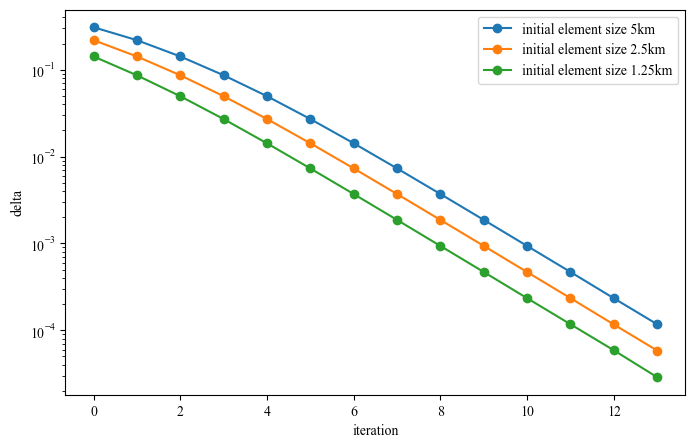

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros((nload, nobs*3))
    uobs_prev = np.zeros((nload, nobs*3))

    for iload in range(nload):
        filename = dir_ls[0] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
        uobs_prev[iload] = np.fromfile(filename, dtype=np.float64)
    for i in range(1, len(dir_ls)):
        for iload in range(nload):
            filename = dir_ls[i] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
            uobs[iload] = np.fromfile(filename, dtype=np.float64)
        delta = np.linalg.norm(uobs - uobs_prev) / np.linalg.norm(uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("delta")

In [4]:
for iter in range(15):
    dat2500 = np.fromfile(dir_ls2[iter] + "displacement/0001_obs.bin", dtype=np.float64)
    dat1250 = np.fromfile(dir_ls3[iter] + "displacement/0001_obs.bin", dtype=np.float64)

observed point:  [180000.  80000. 160000.]
2.780687354254461e-17
2.049326911966841e-17
1.6467289416884053e-17
1.4212942543688763e-17
1.2962005526790458e-17
1.2282490707527265e-17
1.1918938465691263e-17
1.173430896851344e-17
1.1640329484427665e-17
1.1592928598698166e-17
1.1569120153331058e-17
1.1557195507389612e-17
1.1551220710538709e-17
1.1548239728529296e-17
1.1546744345851348e-17
-----
2.0459365579203322e-17
1.6438844612354445e-17
1.4184607873160673e-17
1.2934477007991912e-17
1.2256761141477669e-17
1.189906663337953e-17
1.1714501625414713e-17
1.1620619035411995e-17
1.1573260824233785e-17
1.1549490596701578e-17
1.1537573997478794e-17
1.1531613432189886e-17
1.152863545549837e-17
1.152714864831108e-17
1.152640564398735e-17
-----
1.6313416071747047e-17
1.4062393728909383e-17
1.2814872098972431e-17
1.213841929159222e-17
1.178151332846453e-17
1.1597389726226542e-17
1.1503709358928478e-17
1.1456445976123711e-17
1.1432710254951306e-17
1.1420825618241448e-17
1.1414875160633246e-17
1.141190034

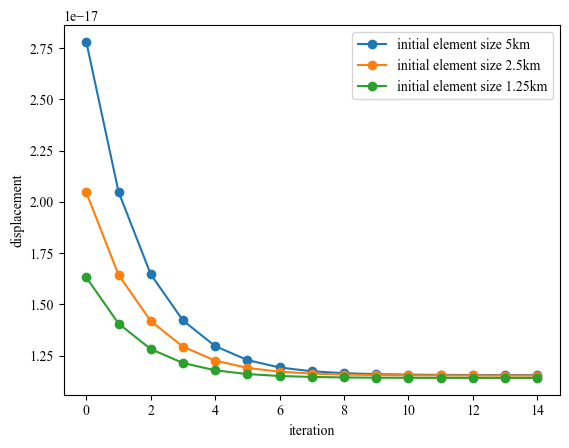

In [5]:
uindex = 669
print("observed point: ", obs_points[uindex//3])
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs = np.zeros(nobs*3)
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "displacement/0001_obs.bin"
        tmp = np.fromfile(filename, dtype=np.float64)
        uobs[:tmp.shape[0]] = tmp
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")
# dat = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_5000_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)
# ax.axhline(dat[uindex], color="black", linestyle="--", label="uniform ds=5km")
# dat = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_2500_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)
# ax.axhline(dat[uindex], color="black", linestyle="--", label="uniform ds=2.5km")
# dat = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_1250_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)
# ax.axhline(dat[uindex], color="black", linestyle="--", label="uniform ds=1.25km")
ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()

0 0.7276661924594289
1 0.4764799519667957
2 0.28447415268816023
3 0.16019019598407241
4 0.08689776361559615
5 0.04551772343838814
6 0.02336646304760005
7 0.011883931134721868
8 0.00811086183806982
9 0.007828927818209588
10 0.007785504544672369
11 0.007789143049353925
12 0.007797018771565911


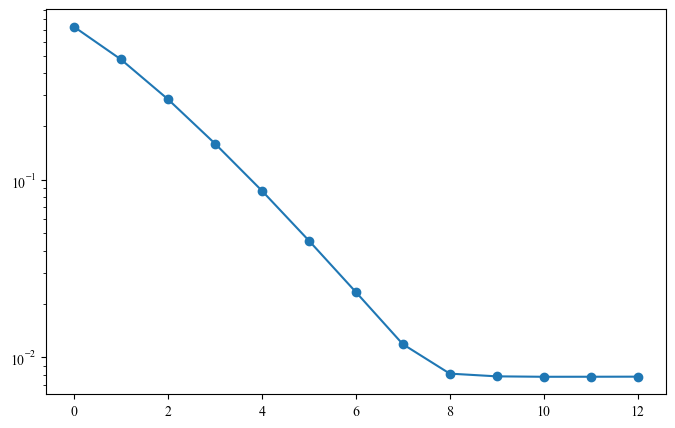

In [7]:
eplt = []
for iter in range(13):
    dat2500 = np.fromfile(dir_ls2[iter] + "/displacement/0003_obs.bin", dtype=np.float64).reshape(-1,3)
    dat1250 = np.fromfile(dir_ls3[iter] + "/displacement/0003_obs.bin", dtype=np.float64).reshape(-1,3)
    err = []
    for ipoint in range(obs_points.shape[0]):
        # x, y, z = obs_points[ipoint]
        # if x <= 1e-8 or x >= 403200 - 1e-8 or y <= 1e-8 or y >= 403200 - 1e-8:
        #     continue
        # e1 = np.linalg.norm(dat2800[ipoint] - dat700_uniform[ipoint])/np.linalg.norm(dat700_uniform[ipoint])
        # e2 = np.linalg.norm(dat2800[ipoint] - dat1400[ipoint])/np.linalg.norm(dat1400[ipoint])
        # err.append(np.min([e1, e2]))
        e1 = np.linalg.norm(dat2500[ipoint] - dat1250[ipoint])/np.linalg.norm(dat1250[ipoint])
        err.append(e1)
    eplt.append(np.max(err))
    print(iter, np.max(err))
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(eplt, marker="o")
ax.set_yscale("log")

214687
247471
346426
391959
489894
637162
863881
1129544
1198436
1463204
1557685
1892630
2082831
2651344
3001419
-----
1217112
1296953
1423177
1540946
1679542
1746252
1908805
1998603
2130172
2306135
2510904
2947389
3186587
3753626
4127871
-----
6975264
7082558
7170034
7219995
7314379
7342492
7460034
7529315
7607904
7817677
7923979
8193021
8388391
8550910
8973503
-----


[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15')]

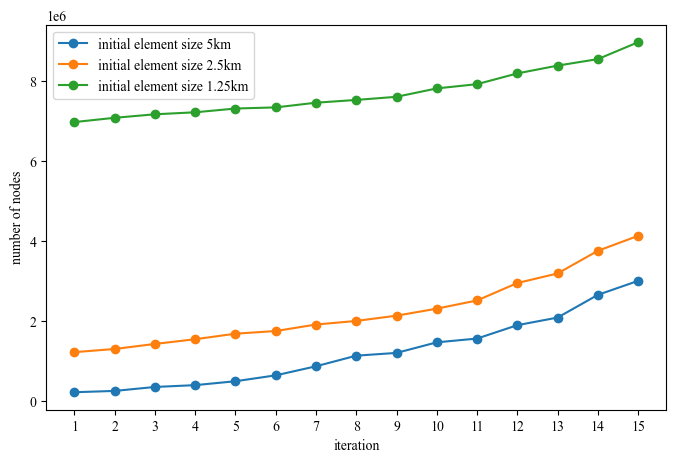

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    nnode_plt = []
    for dir in dir_ls:
        filename = dir + "data/setting.dat"
        with open(filename, "r") as f:
            f.readline()
            nnode = int(f.readline())
            print(nnode)
            nnode_plt.append(nnode) 
    ax.plot(list(range(1, len(dir_ls) + 1)), nnode_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.legend(loc='best')
ax.set_xlabel("iteration")
ax.set_ylabel("number of nodes")
ax.set_xticks(list(range(1, len(dir_ls) + 1)))
ax.set_xticklabels(list(range(1, len(dir_ls) + 1)))


0.11440121220207086
0.06960533168207142
0.08175572921884922
0.05731431923310763
0.03162338216189112
0.018445743559834103
0.009549267677402317
0.004912835236386204
0.002489445264503201
0.0012524008916527936
0.0006277904442949458
0.000314684713790457
0.00015650314739520718
7.861301150957496e-05
-----
0.06837975327841221
0.08445253936453995
0.05490194960733654
0.03371913977530682
0.018277346160059528
0.009599959627152455
0.004910765786404036
0.0024884765732209524
0.0012520916176731066
0.000627914831713155
0.000313902213809252
0.00015684502341317333
7.781124394756425e-05
3.911596401760028e-05
-----
0.08197634679400566
0.05671015747505857
0.033778879031171605
0.016959494157323316
0.009561059656042285
0.004778438329312468
0.0024893150212439634
0.0012534008876894857
0.0006273924037958602
0.00031485535408090496
0.00015667174148435394
7.870584823716712e-05
3.958765857935823e-05
1.866704183871967e-05
-----


Text(0, 0.5, 'delta')

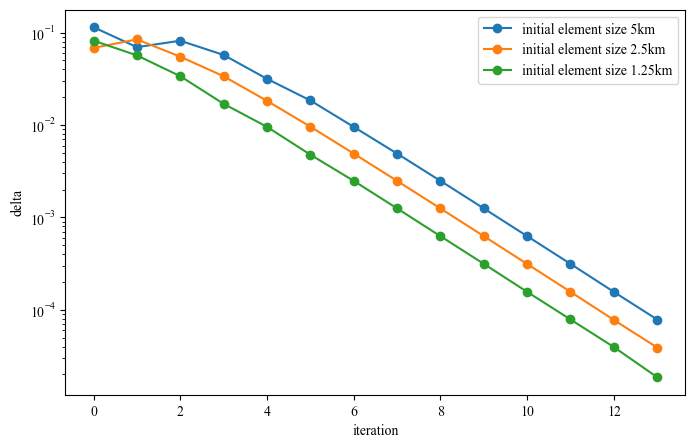

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros(nload)
    uobs_prev = np.loadtxt(dir_ls[0] + "data/greens_function.dat")

    for i in range(1, len(dir_ls)):
        uobs = np.loadtxt(dir_ls[i] + "data/greens_function.dat")
        delta = np.linalg.norm(uobs - uobs_prev) / np.linalg.norm(uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("delta")

In [56]:
obs_points.shape

(253, 3)

0 0.2577700283445937
38
1 0.14109180253474243
38
2 0.15517988373207922
2
3 0.13420503069185533
14
4 0.08788332972558159
14
5 0.050078856891529085
14
6 0.02627888418995296
14
7 0.013299759884021767
14
8 0.0067820964401942106
14
9 0.0040573684166431275
24
10 0.0033572042515384345
24
11 0.00333955096039854
24
12 0.00342322287301244
24
13 0.003487092257706847
24
14 0.0035240082737652153
24


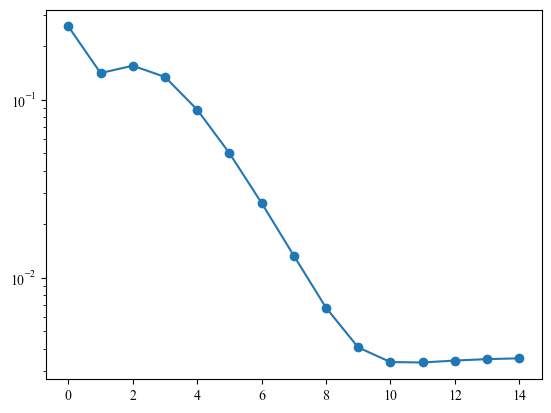

In [64]:
eplt = []
for iter in range(15):
    uobs5000 = np.loadtxt(dir_ls1[iter] + "data/greens_function.dat")
    uobs1250 = np.loadtxt(dir_ls3[iter] + "data/greens_function.dat")
    print(iter, np.linalg.norm(uobs5000 - uobs1250) / np.linalg.norm(uobs5000))
    print(np.argmax(np.abs(uobs5000 - uobs1250)))
    eplt.append(np.linalg.norm(uobs5000 - uobs1250) / np.linalg.norm(uobs5000))
fig, ax = plt.subplots()
ax.plot(eplt, marker="o")
ax.set_yscale("log")

-0.0002106277369848131
-0.0001187825577755439
-0.0001569334577873646
-0.0002277706732737089
-0.0002696199137506023
-0.0002877779058949452
-0.0002987480592776722
-0.0003036677579351223
-0.0003060885566403592
-0.0003072726464197953
-0.0003078550795482139
-0.0003081447690943544
-0.0003082894468853477
-0.000308361300449566
-0.0003083974954260484
-----
-0.0001246178211369593
-0.0001515909116044478
-0.0002260297671402668
-0.0002665704647377727
-0.0002904831418618351
-0.0003013721524951924
-0.0003064547583853973
-0.0003088670647079701
-0.0003100425198553133
-0.0003106203691049526
-0.0003109078346274885
-0.0003110511640475958
-0.0003111218595875468
-0.0003111573373974468
-0.0003111748576556632
-----
-0.0001539751318067361
-0.000221778185597092
-0.0002643100579545896
-0.0002882885129728812
-0.0002962109107915268
-0.0003013174482748852
-0.0003035047109836373
-0.0003046968705087256
-0.0003052845314912446
-0.000305575577891874
-0.0003057208564119813
-0.0003057934645778616
-0.0003058299774752634
-0

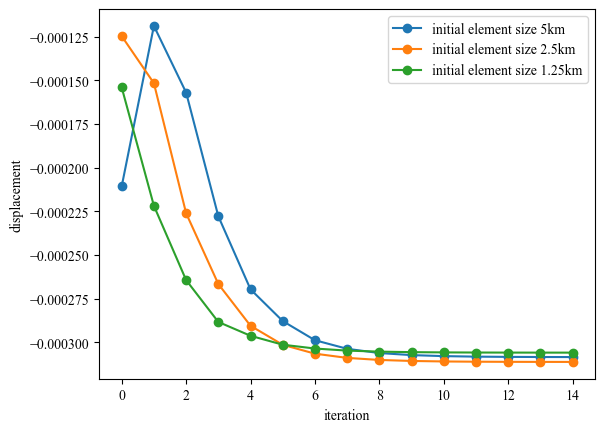

In [74]:
uindex = 24
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs = np.zeros(nload)
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "data/greens_function.dat"
        uobs = np.loadtxt(filename)
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")

# dat_tmp = np.loadtxt("/data4/nakao/AdaptiveFEM/work/work_5000_uniform_gflib/data/greens_function.dat")
# dat = dat_tmp.copy()
# ax.axhline(y=dat[uindex], c="tab:blue",linestyle='--', label='uniform ds=5.0km')

# dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_2500_uniform/displacement/0001_obs.bin", dtype=np.float64)
# dat = []
# for i in range(0, dat_tmp.shape[0]//9):
#     dat.append(dat_tmp[9*i])
#     dat.append(dat_tmp[9*i+1])
#     dat.append(dat_tmp[9*i+2])
# dat = np.array(dat)
# ax.axhline(y=dat[uindex], c="tab:orange",linestyle='--', label='uniform ds=2.5km')

# dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_1250_uniform/displacement/0001_obs.bin", dtype=np.float64)
# dat = []
# for i in range(0, dat_tmp.shape[0]//9):
#     dat.append(dat_tmp[9*i])
#     dat.append(dat_tmp[9*i+1])
#     dat.append(dat_tmp[9*i+2])
# dat = np.array(dat)
# ax.axhline(y=dat[uindex], c="tab:green", linestyle='--', label='uniform ds=1.25km')

# dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_625_uniform/displacement/0001_obs.bin", dtype=np.float64)
# dat = []
# for i in range(0, dat_tmp.shape[0]//9):
#     dat.append(dat_tmp[9*i])
#     dat.append(dat_tmp[9*i+1])
#     dat.append(dat_tmp[9*i+2])
# dat = np.array(dat)
# ax.axhline(y=dat[uindex], c="tab:red", linestyle='--', label='uniform ds=0.625km')

# dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_3125_uniform/displacement/0001_obs.bin", dtype=np.float64)
# dat = []
# for i in range(0, dat_tmp.shape[0]//9):
#     dat.append(dat_tmp[9*i+1])
#     dat.append(dat_tmp[9*i+2])
# dat = np.array(dat)
# ax.axhline(y=dat[uindex], c="tab:red", linestyle='--', label='uniform ds=0.3125km')

ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()

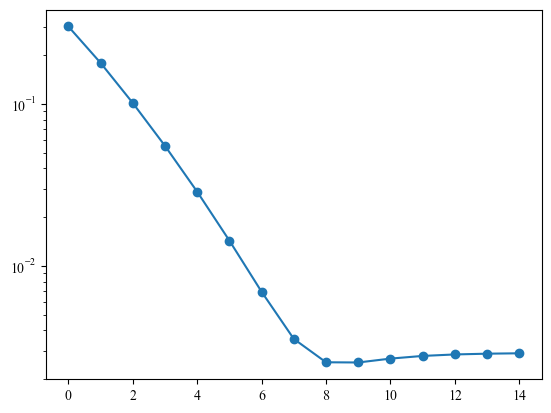

In [73]:
fig, ax = plt.subplots()
eplt = []
for iter in range(15):
    uobs2500 = np.fromfile(dir_ls2[iter] + "displacement/0001_obs.bin", dtype=np.float64)
    uobs1250 = np.fromfile(dir_ls3[iter] + "displacement/0001_obs.bin", dtype=np.float64)
    eplt.append(np.linalg.norm(uobs2500 - uobs1250) / np.linalg.norm(uobs1250))

ax.plot(eplt, marker="o")
ax.set_yscale("log")